(5000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fever      5000 non-null   float64
 1   Headache   5000 non-null   float64
 2   Cough      5000 non-null   float64
 3   Fatigue    5000 non-null   float64
 4   Body_Pain  5000 non-null   float64
 5   Disease    5000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 234.5+ KB
None
Fever        0
Headache     0
Cough        0
Fatigue      0
Body_Pain    0
Disease      0
dtype: int64


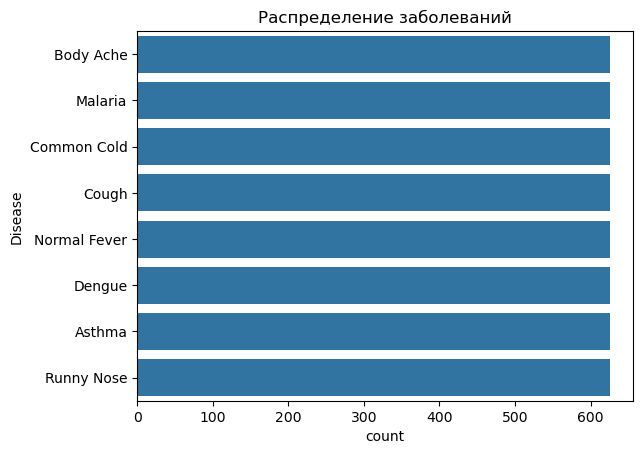

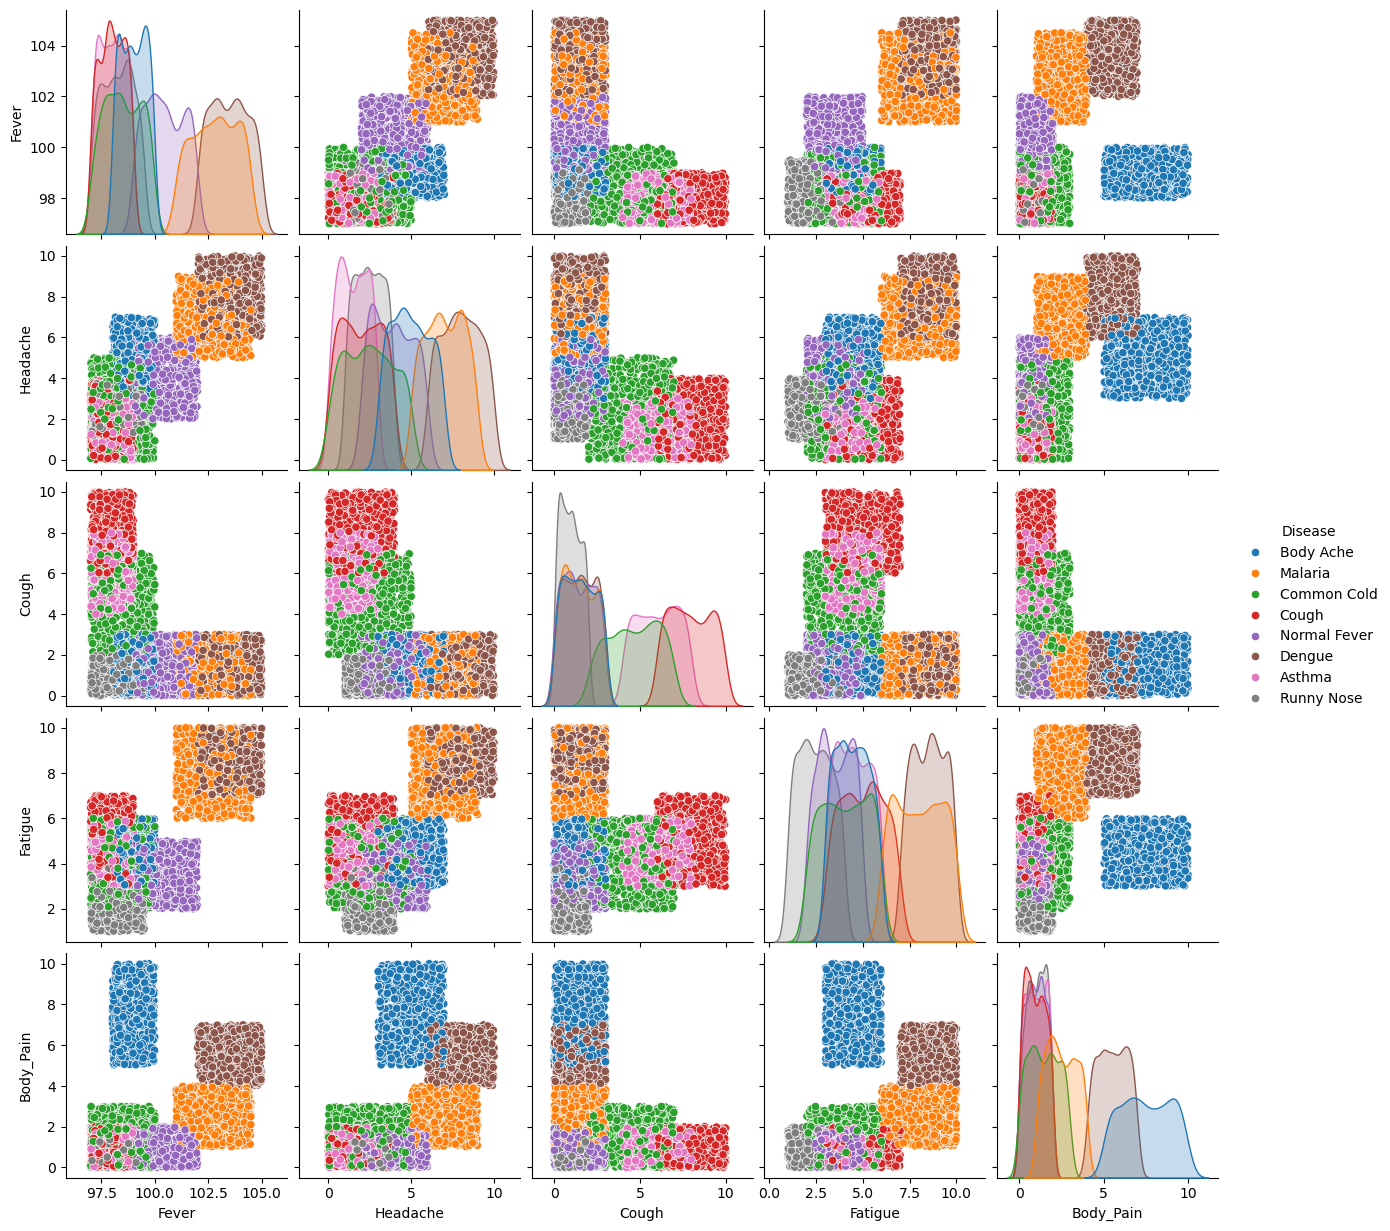

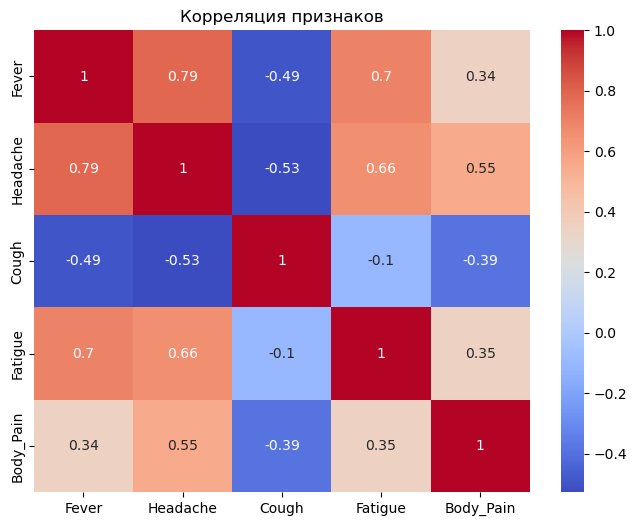

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

üìä –ò—Ç–æ–≥–æ–≤–∞—è —Ç–∞–±–ª–∏—Ü–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:


Accuracy  F1 Macro   ROC AUC
Random Forest Optimized     0.928  0.929018  0.992595
XGBoost Optimized           0.926  0.926847  0.992998
Random Forest               0.919  0.920275  0.992132
Gradient Boosting           0.918  0.919088  0.991914
XGBoost                     0.910  0.911252  0.991746
Decision Tree               0.901  0.902073  0.943429
Logistic Regression         0.878  0.877918  0.985857

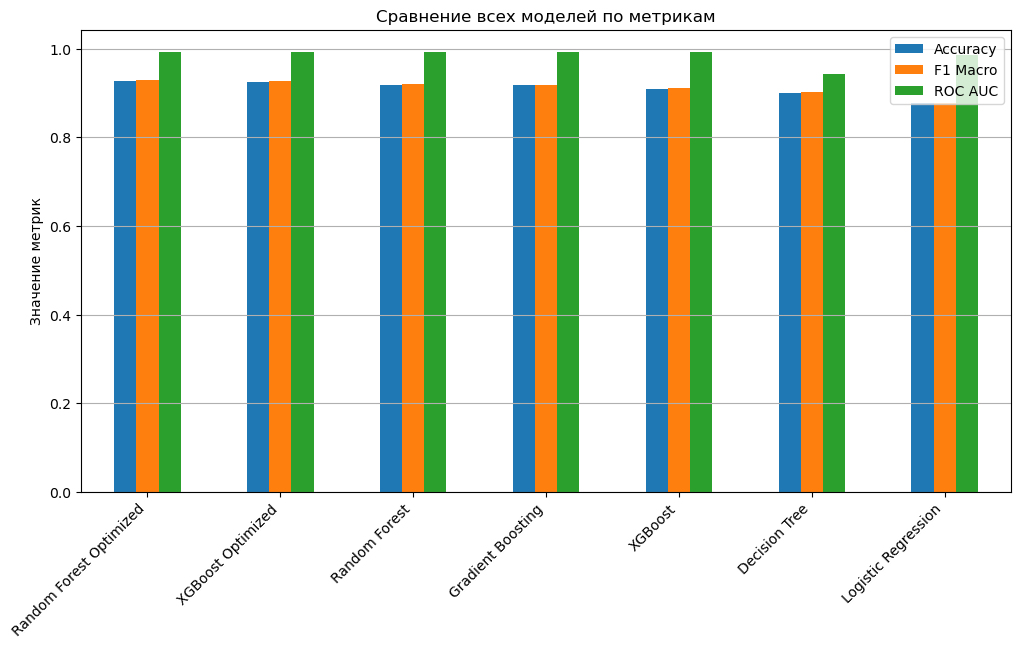

üèÜ –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ F1 Macro: Random Forest Optimized


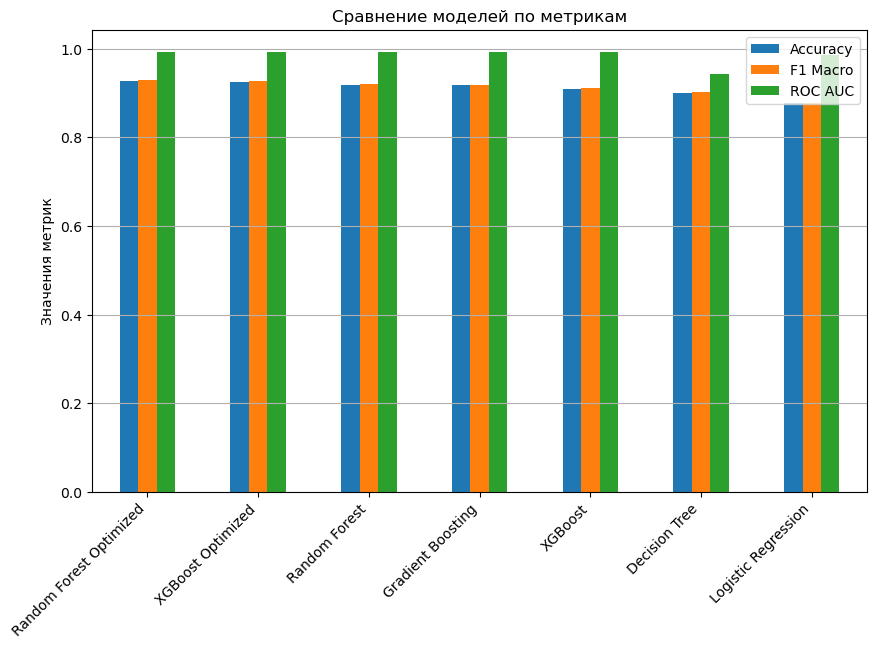

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Random Forest Optimized
Accuracy    0.928000
F1 Macro    0.929018
ROC AUC     0.992595
Name: Random Forest Optimized, dtype: float64


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 1. –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv('/Users/arhipshapovalov/Downloads/dataset1.csv')  # –£–∫–∞–∂–∏—Ç–µ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É —Ñ–∞–π–ª—É
print(df.shape)
df.head()

# 2. EDA - —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–π –∞–Ω–∞–ª–∏–∑
print(df.info())
print(df.isnull().sum())

sns.countplot(y='Disease', data=df)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π')
plt.show()

sns.pairplot(df, hue='Disease')
plt.show()

# 3. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

# 4. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
X = df.drop('Disease', axis=1)
y = df['Disease']

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
le = LabelEncoder()
y_enc = le.fit_transform(y)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–æ–∫
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

# 5. –ë–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ (5 –º–æ–¥–µ–ª–µ–π, 2 –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö)
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 6. –û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –∏ –æ—Ü–µ–Ω–∫–∞
baseline_results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    baseline_results[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'F1 Macro': f1_score(y_test, preds, average='macro'),
        'ROC AUC': roc_auc_score(y_test, proba, multi_class='ovr')
    }

pd.DataFrame(baseline_results).T

# 7. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –¥–ª—è –∞–Ω—Å–∞–º–±–ª–µ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π
param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
}

optimized_results = {}
best_models = {}

for name in param_grids:
    grid = GridSearchCV(models[name], param_grids[name], cv=3, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    preds = best_models[name].predict(X_test)
    proba = best_models[name].predict_proba(X_test)

    optimized_results[name + ' Optimized'] = {
        'Accuracy': accuracy_score(y_test, preds),
        'F1 Macro': f1_score(y_test, preds, average='macro'),
        'ROC AUC': roc_auc_score(y_test, proba, multi_class='ovr')
    }

# 8. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
final_results = {**baseline_results, **optimized_results}

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Ç–∞–±–ª–∏—Ü—É DataFrame
results_df = pd.DataFrame(final_results).T

# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ F1 Macro (–º–æ–∂–Ω–æ –ø–æ –¥—Ä—É–≥–æ–π –º–µ—Ç—Ä–∏–∫–µ)
results_df_sorted = results_df.sort_values('F1 Macro', ascending=False)

# –ß—ë—Ç–∫–∏–π –≤—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü—ã
print("–ò—Ç–æ–≥–æ–≤–∞—è —Ç–∞–±–ª–∏—Ü–∞ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:")
display(results_df_sorted)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø–æ —Ç—Ä—ë–º –º–µ—Ç—Ä–∏–∫–∞–º
results_df_sorted[['Accuracy', 'F1 Macro', 'ROC AUC']].plot.bar(figsize=(12,6))
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å –ø–æ F1 Macro: {results_df_sorted.index[0]}")

# 9. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∏—Ç–æ–≥–æ–≤
results_df_sorted[['Accuracy', 'F1 Macro', 'ROC AUC']].plot.bar(figsize=(10,6))
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 10. –í—ã–≤–æ–¥—ã
best_model = results_df_sorted.iloc[0]
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {results_df_sorted.index[0]}")
print(best_model)
